## Secondary Study to Evaluate Park Density and Air Quality in Los Angeles
* Data acquired from USC.Data.socrata


### Air quality data
### Set-up Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)


### Set-up Multi-API Call
* This data set has 2 years available, so I will create two API calls and add all the date into a single datafram

In [2]:
# The data has 2 years
years = [2014, 2017]
# The endpoint will require I specify the year
url =  "https://usc.data.socrata.com/resource/bhyw-mxf5.json?$where=year="

### Save JSON data into Lists (pre-dataframe step)

In [3]:
# Initialize a list that will eventually be used for form the columns in dataframe.
count = []
dataset = []
date = []
geoid = []
location = []
lat = []
lng = []
neighborhood = []
policy_area = []
row_id = []
tract = []
tract_number = []
variable = []
year = []


for yr in years:
    query_url = f"{url}{yr}"
    response = requests.get(query_url)
    response_json = response.json()
    
    for key in range(len(response_json)):
        count.append(response_json[key]['count'])
        dataset.append(response_json[key]['dataset'])
        date.append(response_json[key]['date'])
        geoid.append(response_json[key]['geoid'])
        location.append(response_json[key]['location'])
        neighborhood.append(response_json[key]['neighborhood'])
        policy_area.append(response_json[key]['policy_area'])
        row_id.append(response_json[key]['row_id'])
        tract.append(response_json[key]['tract'])
        tract_number.append(response_json[key]['tract_number'])
        variable.append(response_json[key]['variable'])
        year.append(response_json[key]['year'])




### Split location column into lat and lng columns
* Having lat and logitudinal data will be useful for map visualization

In [4]:
# Split the location list into two lists, one for lat and one for long data
for i in range(len(location)):
    first = location[i].index(location[i][1])
    last = location[i].index(location[i][-1])
    unpacked = location[i][first:last]
    split_location = unpacked.split(",")
    lat.append(split_location[0])
    lng.append(split_location[1])


### Create Dataframe
* Create a dictionary that contains the list of data from the JSON data, and a label
* Pass the dict object into pd.DataFrame, and create a pandas object

In [5]:
dict = {"year" : year,
        "count" : count,
       "dataset" : dataset,
       "date" :  date,
       "geoid" : geoid,
       "location" : location,
        "lat" : lat,
        "lng" : lng,
        "neighborhood" : neighborhood,
        "policy area" : policy_area,
        "row id": row_id,
        "tract" : tract,
        "tract number" : tract_number,
        "variable" : variable,
       }

df = pd.DataFrame(data = dict)
df

year        count      dataset                     date  \
0     2014  11.04010029  Air Quality  2014-01-01T00:00:00.000   
1     2014  10.95372448  Air Quality  2014-01-01T00:00:00.000   
2     2014  11.11423953  Air Quality  2014-01-01T00:00:00.000   
3     2014  11.14308442  Air Quality  2014-01-01T00:00:00.000   
4     2014  11.18952698  Air Quality  2014-01-01T00:00:00.000   
5     2014  11.21675181  Air Quality  2014-01-01T00:00:00.000   
6     2014  11.28482481  Air Quality  2014-01-01T00:00:00.000   
7     2014  11.39135727  Air Quality  2014-01-01T00:00:00.000   
8     2014  11.44396506  Air Quality  2014-01-01T00:00:00.000   
9     2014  11.16243397  Air Quality  2014-01-01T00:00:00.000   
10    2014  10.86473422  Air Quality  2014-01-01T00:00:00.000   
11    2014  10.97416477  Air Quality  2014-01-01T00:00:00.000   
12    2014  10.80761263  Air Quality  2014-01-01T00:00:00.000   
13    2014  10.94978856  Air Quality  2014-01-01T00:00:00.000   
14    2014   11.0556707  Air Quality  2014-01-01T00:00:00.000   
15    2014  10.60618348  Air Quality  2014-01-01T00:00:00.000   
16    2014   10.6415366  Air Quality  2014-01-01T00:00:00.000   
17    2014  10.68761951  Air Quality  2014-01-01T00:00:00.000   
18    2014  10.58812977  Air Quality  2014-01-01T00:00:00.000   
19    2014  10.50507149  Air Quality  2014-01-01T00:00:00.000   
20    2014  10.59443142  Air Quality  2014-01-01T00:00:00.000   
21    2014  10.52210187  Air Quality  2014-01-01T00:00:00.000   
22    2014  10.57817848  Air Quality  2014-01-01T00:00:00.000   
23    2014  10.63492965  Air Quality  2014-01-01T00:00:00.000   
24    2014  10.66524942  Air Quality  2014-01-01T00:00:00.000   
25    2014  10.74461497  Air Quality  2014-01-01T00:00:00.000   
26    2014   10.7079786  Air Quality  2014-01-01T00:00:00.000   
27    2014  10.80162287  Air Quality  2014-01-01T00:00:00.000   
28    2014  10.76935849  Air Quality  2014-01-01T00:00:00.000   
29    2014  10.78609168  Air Quality  2014-01-01T00:00:00.000   
...    ...          ...          ...                      ...   
1970  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1971  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1972  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1973  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1974  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1975  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1976  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1977  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1978  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1979  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1980  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1981  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1982  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1983  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1984  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1985  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1986  2017        10.79  Air Quality  2017-01-01T00:00:00.000   
1987  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1988  2017        10.79  Air Quality  2017-01-01T00:00:00.000   
1989  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1990  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1991  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1992  2017        11.21  Air Quality  2017-01-01T00:00:00.000   
1993  2017        11.63  Air Quality  2017-01-01T00:00:00.000   
1994  2017        11.63  Air Quality  2017-01-01T00:00:00.000   
1995  2017        11.63  Air Quality  2017-01-01T00:00:00.000   
1996  2017        11.63  Air Quality  2017-01-01T00:00:00.000   
1997  2017        11.63  Air Quality  2017-01-01T00:00:00.000   
1998  2017        12.05  Air Quality  2017-01-01T00:00:00.000   
1999  2017        12.05  Air Quality  201

### Format and Clean Data for Further Analysis
* Convert columns to appropriate data types
* For data imported as strings, remove white space, and misc characters.


In [6]:
# Convert the following column from string to floats. 
# The count column contains pollution data.
# Location, lat and lng to be used for mapping and other analysis

df["count"] = pd.to_numeric(df["count"])
df["lat"] = pd.to_numeric(df["lat"])
df["lng"] = pd.to_numeric(df["lng"])

df.head()

year      count      dataset                     date  \
0  2014  11.040100  Air Quality  2014-01-01T00:00:00.000   
1  2014  10.953724  Air Quality  2014-01-01T00:00:00.000   
2  2014  11.114240  Air Quality  2014-01-01T00:00:00.000   
3  2014  11.143084  Air Quality  2014-01-01T00:00:00.000   
4  2014  11.189527  Air Quality  2014-01-01T00:00:00.000   

                  geoid                   location        lat         lng  \
0  1400000US06037101110  (34.2595555, -118.293602)  34.259555 -118.293602   
1  1400000US06037101122    (34.267357, -118.29024)  34.267357 -118.290240   
2  1400000US06037101210  (34.251998, -118.2926875)  34.251998 -118.292687   
3  1400000US06037101220  (34.2511895, -118.281014)  34.251190 -118.281014   
4  1400000US06037101300  (34.2455945, -118.271731)  34.245595 -118.271731   

  neighborhood  policy area                                         row id  \
0      Tujunga  Environment  PM2.5_Concentration_2014_1400000US06037101110   
1      Tujunga  Environment  PM2.5_Concentration_2014_1400000US06037101122   
2      Tujunga  Environment  PM2.5_Concentration_2014_1400000US06037101210   
3      Tujunga  Environment  PM2.5_Concentration_2014_1400000US06037101220   
4      Tujunga  Environment  PM2.5_Concentration_2014_1400000US06037101300   

                                               tract tract number  \
0  Census Tract 1011.10, Los Angeles County, Cali...       101110   
1  Census Tract 1011.22, Los Angeles County, Cali...       101122   
2  Census Tract 1012.10, Los Angeles County, Cali...       101210   
3  Census Tract 1012.20, Los Angeles County, Cali...       101220   
4  Census Tract 1013, Los Angeles County, California       101300   

              variable  
0  PM2.5 Concentration  
1  PM2.5 Concentration  
2  PM2.5 Concentration  
3  PM2.5 Concentration  
4  PM2.5 Concentration

### Visualize Data using Gmaps

In [7]:
# Store latitude and longitude in locations
locations = df[["lat", "lng"]]

# Plot Heatmap
fig = gmaps.figure()

symbol_layer = gmaps.symbol_layer(locations, fill_color='red', stroke_color='black', scale=2)

# Add layer
fig.add_layer(symbol_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

##  Aggregate Data by Year and then remove multilevel index

In [8]:
# Aggregate by neighborhood and generate columns for lat, long, and pollution counts.
aggregated_data = df.groupby("neighborhood").agg(["min", "max", "mean"])

air_agg_level_0 = aggregated_data.columns.get_level_values(0)
air_agg_level_1 = aggregated_data.columns.get_level_values(1)

# Remove multilevel index and assign to same df
aggregated_data.columns = air_agg_level_0 + '_' + air_agg_level_1
aggregated_data = aggregated_data[["count_mean", "lat_min", "lng_min"]]
pollution_mean = aggregated_data["count_mean"]
neighborhood_lat = aggregated_data["lat_min"]
neighborhood_lng = aggregated_data["lng_min"]

### Determine the relationship between latitude and pollution counts

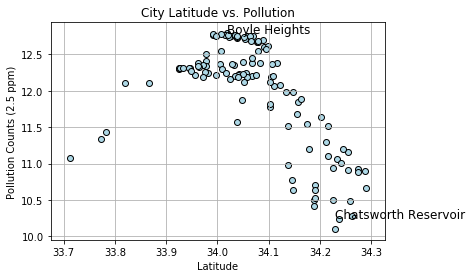

In [9]:
# Plot the pollution counts by neighborhood (via their lat) and visualize in gmaps
x = neighborhood_lat
y = pollution_mean
plt.scatter(x, y, c = 'lightblue', edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Pollution Counts (2.5 ppm)")
plt.title(f"City Latitude vs. Pollution")
plt.grid(True)

# Label the neighborhood with the heighest and lowest counts
# X,Y Coordinates for BH and Chatsworth reservoice
boyle_heights_lat = 34.018117
boyle_heights_cnt = 12.791653
chatsworth_res_lat = 34.228206
chatsworth_res_cnt = 10.245630
plt.text(x = boyle_heights_lat, y = boyle_heights_cnt, s = "Boyle Heights", fontsize = 12)
plt.text(chatsworth_res_lat, chatsworth_res_cnt, s = "Chatsworth Reservoir", fontsize = 12)
plt.savefig('lat_vs_pollution.png')


### Determine the Covariance
* Use numpy np.cov() to evaluate
* a) how the temperature and latitude vary together
* b) determine the directionality of any association
* Statistical Principal:
* The covariance is used to determine the direction of a linear relationship between two variables as follows:
* If both variables tend to increase or decrease together, the coefficient is positive.
* If one variable tends to increase as the other decreases, the coefficient is negative.

In [10]:
x = neighborhood_lat
y = pollution_mean

np.cov(x,y)

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(x, y)
covariance_matrix

# Extract covariance of latitude and Max Temperature
pol_lav_covariance = covariance_matrix[0,1]
pol_lav_covariance

if (pol_lav_covariance < 0):
    print(f"The covariance for latitude and temperature is {round(pol_lav_covariance,4)}, and is negative. \nThis states that as one variable increases, the other decreases.")
else:
    print(f"The covariance for latitude and temperature is {round(pol_lav_covariance,4)}, is positive. \nThis states that these variable tend to either increase or decrease together.")

The covariance for latitude and temperature is -0.0482, and is negative. 
This states that as one variable increases, the other decreases.


### Determine the Pearson Coefficient
* Use numpy np.corrcoef() to evaluate 
* a) how the temperature and latitude vary together
* b) Examine the linear relationship between these two variables 

* Statistical Principal: 
* Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance.
* The strenght of the association depends on how close the value approaches -1 or 1.
* The directionality of the association depends on whether it is positive or negative.

In [11]:
# Function that Computes the Pearson correlation coefficient between two arrays.
def pearson_r(x, y):

    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(x, y)

# Print the result
print(r)

if (r < 0):
    print(f"Since r = {round(r,4)}, is negative; as one variable increases, the other decreases.")
    if(r <= -0.75):
        print(f"Since r = {round(r,4)} is close to -1; There is a strong inverse relationship between these two variables.")
if (r > 0):
    print(f"Since r = {round(r,4)}, is positive; both variables increase together, or decrease together.")
    if (r >= 0.75):
        print(f"Since r = {round(r,4)} is close to 1; There is a strong positive relationship between these two variables.")
    else:
        print("There is a weak or no association between both variables.")

-0.5914960694899909
Since r = -0.5915, is negative; as one variable increases, the other decreases.


### Visualize 5 neighborhoods with the higest and lowest pollution and plot in gmap

In [12]:
# Top 5 cities with the heighest pollutio using "nlargest"
top_5_pollution = aggregated_data.nlargest(5, "count_mean")
low_5_pollution = aggregated_data.nsmallest(5, "count_mean")

In [13]:

# Further subset the lat and lng for each of these cities and save into a new df
top_5_loc = top_5_pollution[["lat_min", "lng_min"]]
low_5_loc = low_5_pollution[["lat_min", "lng_min"]]

In [14]:
# Store latitude and longitude in locations
top_locations = top_5_loc
low_locations = low_5_loc

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
top_layer = gmaps.heatmap_layer(top_locations)
top_marker_layer = gmaps.marker_layer(top_locations, label='high')

low_layer = gmaps.heatmap_layer(low_locations)
low_marker_layer = gmaps.marker_layer(low_locations, label='low')

# Add layer
fig.add_layer(top_layer)
fig.add_layer(top_marker_layer)
fig.add_layer(low_layer)
fig.add_layer(low_marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Visualize the counts in gmaps to highlight distribution of pollution

In [15]:
# Assign the lat and long variable of the aggregated dataset to the location variable
location = aggregated_data[["lat_min", "lng_min"]]

# Plot Heatmap
locations = location
weights = pollution_mean

fig = gmaps.figure(map_type="SATELLITE")

# # Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights)

# # Add layer
fig.add_layer(heat_layer)

# # Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Park Data

In [16]:
park_url =  "https://usc.data.socrata.com/resource/kp5h-fmqh.json?dataset=Parks Access"

In [17]:
park_count = []
park_dataset = []
park_date = []
park_geoid = []
park_location = []
park_lat = []
park_lng = []
park_neighborhood = []
park_policy_area = []
park_row_id = []
park_tract = []
park_tract_number = []
park_variable = []
park_year = []


query_url_park = f"{park_url}"
response = requests.get(query_url_park)
park_response_json = response.json()
# park_response_json[0:10]

for index in range(len(park_response_json)):
    try:
        park_count.append(park_response_json[index]['count'])
        park_dataset.append(park_response_json[index]['dataset'])
        park_date.append(park_response_json[index]['date'])
        park_geoid.append(park_response_json[index]['geoid'])
        park_location.append(park_response_json[index]['location']['coordinates'])
        park_neighborhood.append(park_response_json[index]['neighborhood'])
        park_policy_area.append(park_response_json[index]['policy_area'])
        park_row_id.append(park_response_json[index]['row_id'])
        park_tract.append(park_response_json[index]['tract'])
        park_tract_number.append(park_response_json[index]['tract_number'])
        park_variable.append(park_response_json[index]['variable'])
        park_year.append(park_response_json[index]['year'])
    except: 
        print(f"this {index} is no good")




this 440 is no good
this 847 is no good


In [18]:
for i in range(len(park_location)):
    park_lat.append(park_location[i][1])
    park_lng.append(park_location[i][0])
    

In [19]:
dict = {"year" : park_year,
        "count" : park_count,
       "dataset" : park_dataset,
        "lat" : park_lat,
        "lng" : park_lng,
       "date" :  park_date,
       "geoid" : park_geoid,
       "location" : park_location,
        "neighborhood" : park_neighborhood,
        "policy area" : park_policy_area,
        "row id": park_row_id,
        "tract" : park_tract,
        "tract number" : park_tract_number,
        "variable" : park_variable,
       }

df_park = pd.DataFrame(data = dict)
df_park

year               count       dataset        lat         lng  \
0    2015  0.2307633501355139  Parks Access  34.049649 -118.381096   
1    2015   4.212398007039556  Parks Access  34.021380 -118.431080   
2    2015  0.6445143626731451  Parks Access  34.269881 -118.455282   
3    2015                   0  Parks Access  34.070676 -118.007789   
4    2015   1.987031611479213  Parks Access  33.924654 -118.233550   
5    2015   1.752213304804469  Parks Access  34.195881 -118.335306   
6    2015   17.82736889329126  Parks Access  33.974204 -118.208089   
7    2015                   0  Parks Access  33.931908 -118.027041   
8    2015                   0  Parks Access  33.929254 -118.267186   
9    2015                   0  Parks Access  34.051401 -118.014185   
10   2015                   0  Parks Access  33.829768 -118.270758   
11   2015                   0  Parks Access  34.073789 -118.139436   
12   2015                   0  Parks Access  34.072580 -118.365913   
13   2015   0.065789509187055  Parks Access  34.144427 -118.263652   
14   2015   6.013202308373737  Parks Access  33.980900 -118.049611   
15   2015  0.1208211499487959  Parks Access  34.121669 -118.209149   
16   2015   1.157761943486816  Parks Access  34.163408 -118.126389   
17   2015                   0  Parks Access  34.233767 -118.429943   
18   2015   1.915739598624639  Parks Access  33.871521 -118.155610   
19   2015                   0  Parks Access  34.103307 -117.912165   
20   2015                   0  Parks Access  34.071925 -117.983875   
21   2015    69.8873114752882  Parks Access  34.009386 -118.367527   
22   2015                   0  Parks Access  34.234694 -118.582668   
23   2015   7.698791204482059  Parks Access  33.957535 -117.975981   
24   2015                   0  Parks Access  33.953722 -118.235928   
25   2015    3.80493203989982  Parks Access  33.900081 -118.151439   
26   2015  0.4433849754689084  Parks Access  34.081514 -118.251766   
27   2015   1.226654712939115  Parks Access  34.012081 -118.132457   
28   2015                   0  Parks Access  34.052917 -117.815750   
29   2015   3.712702794165304  Parks Access  34.143853 -118.370324   
..    ...                 ...           ...        ...         ...   
968  2015   13.83874702975522  Parks Access  33.982599 -117.942460   
969  2015                   0  Parks Access  34.045246 -117.916803   
970  2015                   0  Parks Access  34.052431 -118.253282   
971  2015                   0  Parks Access  33.976373 -118.109921   
972  2015                   0  Parks Access  34.192060 -118.514210   
973  2015                   0  Parks Access  34.255510 -118.425748   
974  2015  0.2914464245568674  Parks Access  34.099232 -118.342120   
975  2015   1.973063065990431  Parks Access  34.048208 -118.371729   
976  2015    0.60304582230694  Parks Access  34.067109 -118.112061   
977  2015  0.9721596275223686  Parks Access  34.258277 -118.450367   
978  2015   18.31422042253963  Parks Access  34.100216 -118.243713   
979  2015   6.051922811395239  Parks Access  34.030352 -117.842746   
980  2015   1.706832049312072  Parks Access  33.947814 -118.015929   
981  2015   5.231332412617857  Parks Access  34.274557 -118.343902   
982  2015   3.016972759823472  Parks Access  33.885689 -118.126066   
983  2015                   0  Parks Access  33.909162 -118.273749   
984  2015   2.546340103770498  Parks Access  34.084605 -118.348422   
985  2015   3.687102355327469  Parks Access  33.962694 -118.444447   
986  2015                   0  Parks Access  34.121613 -118.218649   
987  2015                   0  Parks Access  34.290512 -118.492891   
988  2015                   0  Parks Access  34.053061 -118.281509   
989  2015                   0  Parks Access  33.842811 -118.283295   
990  2015   56.82780996462145  Parks Access  34.146927 -118.591403   
991  2015   1.149223347846279  Parks Access  34.126938 -117.978573   
992  2015                   0  Parks Access  34.161172 -118.112295   
993  2015   1.4

### Explore Dataframe Details (Size, Info, Description)
* Determine which series in dataframe need the datatype to be changed.

In [20]:
# Dimensions
print(df_park.ndim)

# How many values are in the dataframe
print(df_park.size)

# Datatype, counts, and memory usage for dataframe
print(df_park.info())


2
13972
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
year            998 non-null object
count           998 non-null object
dataset         998 non-null object
lat             998 non-null float64
lng             998 non-null float64
date            998 non-null object
geoid           998 non-null object
location        998 non-null object
neighborhood    998 non-null object
policy area     998 non-null object
row id          998 non-null object
tract           998 non-null object
tract number    998 non-null object
variable        998 non-null object
dtypes: float64(2), object(12)
memory usage: 109.2+ KB
None


In [21]:
# Change Datatypes for "count" from object to float
df_park["count"] = df_park["count"].astype("float")


### Aggregate Data by Year

In [22]:
# Aggregate by neighborhood and generate columns for lat, long, and pollution counts.
agg_park_data = df_park.groupby("neighborhood").agg(["min", "max", "mean"])

# # Create an array for the mean pollution per city
park_mean = np.array(agg_park_data["count"]["mean"])

# # Create an array for the lat and log for each neighborhood
park_neighborhood_lat = np.array(agg_park_data["lat"]["min"])
park_neighborhood_lng = np.array(agg_park_data["lng"]["min"])

### Remove Multilevel Index

In [23]:
agg_level_0 = agg_park_data.columns.get_level_values(0)
agg_level_1 = agg_park_data.columns.get_level_values(1)
agg_park_data.columns = agg_level_0 + '_' + agg_level_1
agg_park_data = agg_park_data[['count_mean', 'lat_min', 'lng_min',]]

### Map neighborhoods in Analysis

In [24]:
# Store latitude and longitude in locations
locations = df_park[["lat", "lng"]]

# Plot Heatmap
fig = gmaps.figure()

symbol_layer = gmaps.symbol_layer(locations, fill_color='green', stroke_color='green', scale=2)

# Add layer
fig.add_layer(symbol_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Determine the neighborhoods with the highest and lowest access greenspace

In [25]:
max_sorted_pdf = agg_park_data.sort_values(by = ("count_mean"), ascending = False)
min_sorted_pdf = agg_park_data.sort_values(by = ("count_mean"), ascending = True)

max_parks = max_sorted_pdf[["lat_min", "lng_min"]]
min_parks = min_sorted_pdf[["lat_min", "lng_min"]]

top_gcities = max_parks[0:5]
low_gcities = min_parks[0:5]
max_sorted_pdf["count_mean"].head()


neighborhood
Claremont           292.966334
Whittier Narrows    276.918917
San Dimas           173.892550
Beverly Hills       120.053140
North Whittier       91.360455
Name: count_mean, dtype: float64

In [26]:
# Store latitude and longitude in locations
top_locations = top_gcities[["lat_min", "lng_min"]]
low_locations = low_gcities[["lat_min", "lng_min"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
top_layer = gmaps.heatmap_layer(top_locations)
top_marker_layer = gmaps.marker_layer(top_locations, label='high')

low_layer = gmaps.heatmap_layer(low_locations)
low_marker_layer = gmaps.marker_layer(low_locations, label='low')

# Add layer
fig.add_layer(top_layer)
fig.add_layer(top_marker_layer)
fig.add_layer(low_layer)
fig.add_layer(low_marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Heatmap the density of parks in LA

In [27]:
# Filter the location and mean park data into two variables for use in plot.
mean_park_locations = agg_park_data[["lat_min", "lng_min"]]
mean_park_counts = agg_park_data["count_mean"].astype(dtype = "float")

locations = mean_park_locations
weights = mean_park_counts

fig = gmaps.figure(map_type="SATELLITE")

# # Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights)

# # Add layer
fig.add_layer(heat_layer)

# # Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Determine if Air quality and Parks Impact Rental Rates
* Merge three datasets Air quality, Park density, and Rent in LA

In [28]:
rent_df = pd.read_csv("LA_rentmedian.csv")
rent_df = rent_df.rename(columns = {"Tract Number": "tract number", "Median Rent 2016" : "Median Rent"})

# Subset air quality and park dataframes
df_air = df[["year", "count", "lat", "lng", "neighborhood", "tract number"]]
df_park_condensed = df_park[["year", "count", "lat", "lng" , "neighborhood", "tract number"]]

df_air_2017 = df_air[df_air["year"] == "2017"]
df_park_2017 = df_park_condensed[df_park_condensed["year"] == "2015"]

df_air_pre_merge = df_air_2017.drop("year", axis = 1)
df_park_pre_merge = df_park_2017.drop("year", axis = 1)

# # Merge air and park dataframes
air_park_rent = df_park_pre_merge.merge(df_air_pre_merge, how = "left", on = "tract number")
air_park_rent["tract number"] = air_park_rent["tract number"].astype('int')
air_park_rent_v2 = air_park_rent.drop(["lat_x","lng_x"], axis = 1)


# Merge merged air and park dataframe with rent
merged_df = air_park_rent.merge(rent_df, how = 'left', on = "tract number")
merged_df_clean = merged_df.drop(["lat_x", "lng_x", "neighborhood_y", "neighborhood_y"], axis = 1)
merged_df_clean = merged_df_clean.rename(columns = {"count_x" : "Air Pollution Count", "count_y" : "Park Counts", "lat_y" : "Lat", "lng_y" : "Lng"})

In [29]:
# Get Summary Statistics on Numberic columns
merged_df_clean.describe(include=[np.number]).T

count           mean            std            min  \
Air Pollution Count  998.0       7.147924      48.686786       0.000000   
tract number         998.0  328219.580160  156098.462202  101110.000000   
Park Counts          515.0      11.896690       0.839438       9.955483   
Lat                  515.0      34.093668       0.118068      33.713354   
Lng                  515.0    -118.366033       0.109471    -118.655575   
Median Rent          990.0    1390.824242     465.154789     299.000000   

                               25%            50%            75%  \
Air Pollution Count       0.000000       0.019650       1.733694   
tract number         198025.000000  294765.500000  481177.000000   
Park Counts              11.210000      12.050000      12.890000   
Lat                      34.027899      34.080979      34.191931   
Lng                    -118.441966    -118.348423    -118.282829   
Median Rent            1094.000000    1250.000000    1575.750000   

                               max  
Air Pollution Count     961.636955  
tract number         573002.000000  
Park Counts              12.890000  
Lat                      34.323194  
Lng                    -118.172802  
Median Rent            3500.000000

In [30]:
# Get Summary Statistics on Categorical columns
merged_df_clean.describe(include=[np.object, pd.Categorical]).T

count unique                        top freq
neighborhood_x   998    193                 Long Beach   24
Neighborhood     990    192                 Long Beach   24
Location         990    990  (34.1248395, -118.007363)    1

In [31]:
# Determine which rows have missing values
merged_df_clean.isnull()\
                .sum(axis = 0)\
                .sort_values(ascending = False)\
                .head()

Lng             483
Lat             483
Park Counts     483
Location          8
Neighborhood      8
dtype: int64

In [32]:
# Since Lng, Lat, and park counts have nearly 500 missing values, these will be removed
merged_df_clean_nan = merged_df_clean.dropna(how = "any" , axis = 0)
merged_df_clean_nan.isnull()\
                .sum(axis = 0)\
                .sort_values(ascending = False)\
                .head()



Location        0
Neighborhood    0
Median Rent     0
Lng             0
Lat             0
dtype: int64

### Exploritory Data Analysis
* Empirical Cummulative Density Functions

In [33]:
# Function to generate an empirical cummulative distribution function coordinates
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [34]:
# Variables
rent_array = merged_df_clean_nan["Median Rent"]
park_array = merged_df_clean_nan["Park Counts"]
air_array = merged_df_clean_nan["Air Pollution Count"]

#### ECDF for air pollution

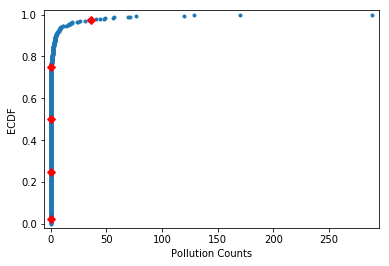

In [35]:
x = np.sort(air_array)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Pollution Counts')
_ = plt.ylabel('ECDF')

# Add percentile markers
percentiles = np.array([2.5,25, 50, 75, 97.5])
ptiles_air = np.percentile(air_array, percentiles)
_ = plt.plot(ptiles_air, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.margins(0.02) # Keeps data off plot edges
plt.show()

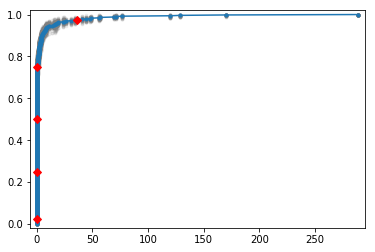

In [36]:
for i in range(50):
    # Generate bootstrap sample:
    bs_sample = np.random.choice(air_array, size=len(air_array))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(air_array)
_ = plt.plot(x, y, marker='.')

# Add percentile markers
percentiles = np.array([2.5,25, 50, 75, 97.5])
ptiles_air = np.percentile(air_array, percentiles)
_ = plt.plot(ptiles_air, percentiles/100, marker='D', color='red',
         linestyle='none')


# Make margins and label axes
plt.margins(0.02)

### Distribution of Park Count Data

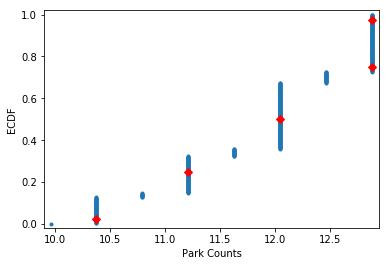

In [37]:
x = np.sort(park_array)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Park Counts')
_ = plt.ylabel('ECDF')


# Add percentile markers
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_park = np.percentile(park_array, percentiles)
_ = plt.plot(ptiles_park, percentiles/100, marker='D', color='red', linestyle='none')

plt.margins(0.02) # Keeps data off plot edges
plt.show()


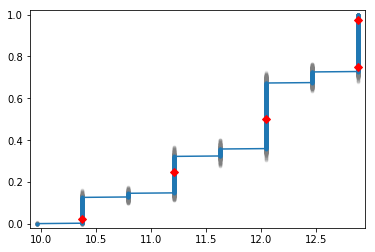

In [38]:
for i in range(50):
    # Generate bootstrap sample:
    bs_sample = np.random.choice(park_array, size=len(park_array))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(park_array)
_ = plt.plot(x, y, marker='.')

# Add percentile markers
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_park = np.percentile(park_array, percentiles)
_ = plt.plot(ptiles_park, percentiles/100, marker='D', color='red', linestyle='none')


# Make margins and label axes
plt.margins(0.02)

### Distribution of Rent Data

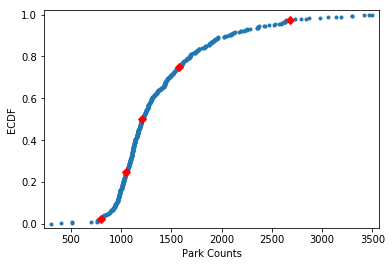

In [39]:
x = np.sort(rent_array)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Park Counts')
_ = plt.ylabel('ECDF')

percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_rent = np.percentile(rent_array, percentiles)
_ = plt.plot(ptiles_rent, percentiles/100, marker='D', color='red', linestyle='none')

plt.margins(0.02) # Keeps data off plot edges
plt.show()

### Distribution

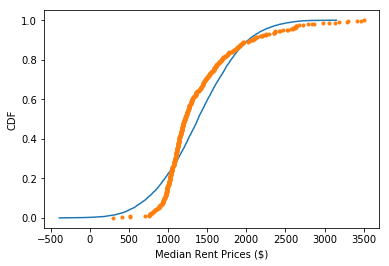

In [40]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(rent_array)
sigma = np.std(rent_array)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(rent_array)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Median Rent Prices ($)')
_ = plt.ylabel('CDF')
plt.show()

### Visualizing the distribution of the Median Rental Price using Bootstrapping

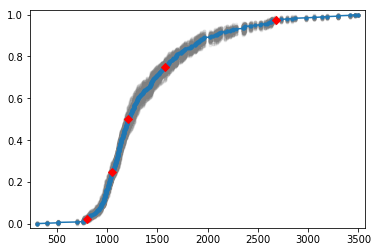

In [41]:
for i in range(50):
    # Generate bootstrap sample:
    bs_sample = np.random.choice(rent_array, size=len(rent_array))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rent_array)
_ = plt.plot(x, y, marker='.')

percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_rent = np.percentile(rent_array, percentiles)
_ = plt.plot(ptiles_rent, percentiles/100, marker='D', color='red', linestyle='none')


# Make margins and label axes
plt.margins(0.02)

#### Determine if Air Counts is normally distributed by comparing to theoretical distribution

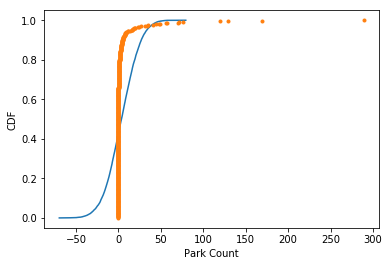

In [42]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(merged_df_clean_nan["Air Pollution Count"])
sigma = np.std(merged_df_clean_nan["Air Pollution Count"])

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(merged_df_clean_nan["Air Pollution Count"])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Park Count')
_ = plt.ylabel('CDF')
plt.show()

#### Determine if Park Counts is normally distributed by comparing to theoretical distribution

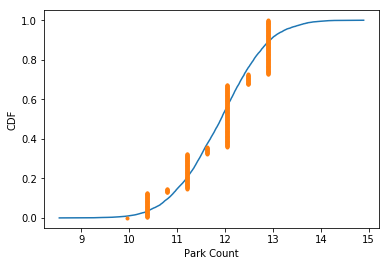

In [43]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(merged_df_clean_nan["Park Counts"])
sigma = np.std(merged_df_clean_nan["Park Counts"])

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(merged_df_clean_nan["Park Counts"])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Park Count')
_ = plt.ylabel('CDF')
plt.show()

### Begin Covariance and Pearson correlation coefficient Analysis 

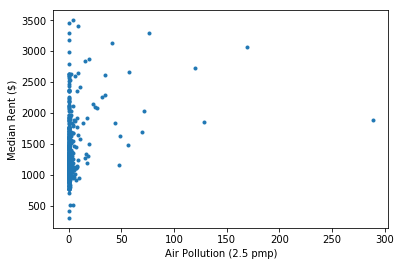

In [44]:
_ = plt.plot(air_array, rent_array, marker='.', linestyle='none')


# Label the axes
_ = plt.ylabel('Median Rent ($)')
_ = plt.xlabel('Air Pollution (2.5 pmp)')

# Show the result
plt.show()

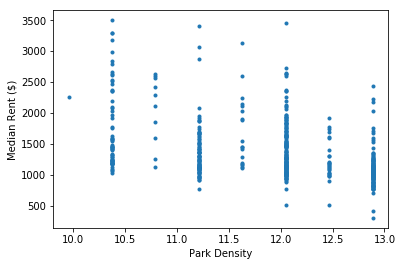

In [45]:
_ = plt.plot(park_array, rent_array, marker='.', linestyle='none')


# Label the axes
_ = plt.ylabel('Median Rent ($)')
_ = plt.xlabel('Park Density')

# Show the result
plt.show()

### Compute the covariance

In [46]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(rent_array, air_array)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
rent_air_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(rent_air_cov)

[[252319.96748398   2555.22988943]
 [  2555.22988943    345.41406121]]
2555.229889431639


In [47]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(rent_array, park_array)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
rent_park_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(rent_park_cov)


[[ 2.52319967e+05 -1.74143542e+02]
 [-1.74143542e+02  7.05273837e-01]]
-174.1435417495522


### Computing the Pearson correlation coefficient


In [48]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [49]:
# Compute Pearson correlation coefficient for median rent and air quality: r
r = pearson_r(air_array, rent_array)

# Print the result
print(r)


0.27370590206056333


slope = 7.3975850330535415 Median Rental Price ($) / Air pullution (2.5 ppm)
intercept = 1354.4838231880958 Median Rental Price ($)


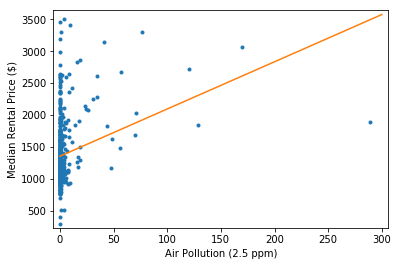

In [50]:
# Plot the median rent $ rate versus air quality
_ = plt.plot(air_array, rent_array, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Air Pollution (2.5 ppm)')
_ = plt.ylabel('Median Rental Price ($)')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(air_array, rent_array, 1)

# Print the results to the screen
print('slope =', a, 'Median Rental Price ($) / Air pullution (2.5 ppm)')
print('intercept =', b, 'Median Rental Price ($)')

# Make theoretical line to plot
x = np.array([0, 300])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

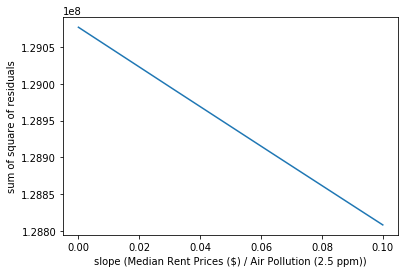

In [51]:
# Determine how optimal is the residual sum of squares

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((rent_array - a * air_array - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (Median Rent Prices ($) / Air Pollution (2.5 ppm))')
plt.ylabel('sum of square of residuals')

plt.show()


In [52]:
# Compute Pearson correlation coefficient for median rent and park density: r
r = pearson_r(park_array, rent_array)

# Print the result
print(r)

-0.41281234500478764


slope = 7.3975850330535415 Median Rental Price ($) / Park Counts
intercept = 1354.4838231880958 Median Rental Price ($)


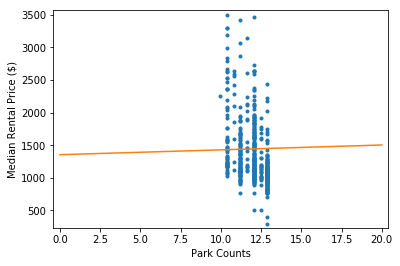

In [53]:
# Plot the air pollution rate versus median rent $
_ = plt.plot(park_array, rent_array, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Park Counts')
_ = plt.ylabel('Median Rental Price ($)')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(air_array, rent_array, 1)

# Print the results to the screen
print('slope =', a, 'Median Rental Price ($) / Park Counts')
print('intercept =', b, 'Median Rental Price ($)')

# Make theoretical line to plot
x = np.array([0, 20])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

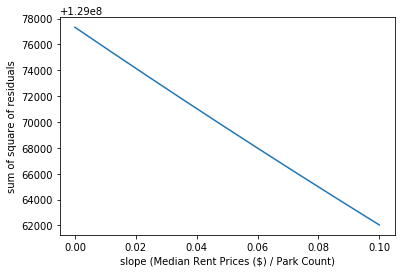

In [54]:
# Determine how optimal is the residual sum of squares

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((rent_array - a * park_array - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (Median Rent Prices ($) / Park Count)')
plt.ylabel('sum of square of residuals')

plt.show()



### Bootstrapping Functions

In [55]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [56]:
def draw_bs_reps(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [57]:
# This function to be used for linear regression analysis
def draw_bs_pairs_linreg(x, y, size=1):

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


### Bootstrap replicates of the mean and the SEM of the Rent Data

22.19933668371302
22.297881817943633


/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


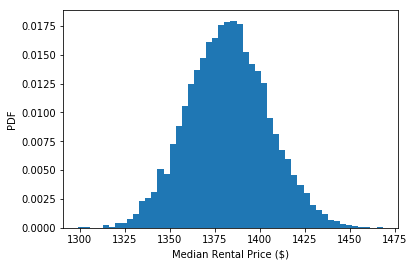

In [58]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rent_array, func = np.mean, size = 10000)

# Compute and print SEM
sem = np.std(rent_array) / np.sqrt(len(rent_array))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Median Rental Price ($)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Bootstrap replicates of the variance for the Rent Data

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


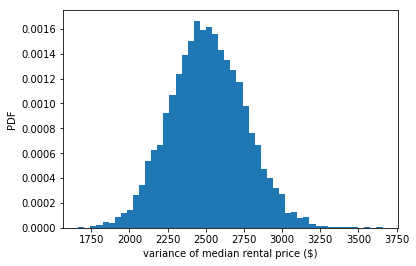

In [59]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rent_array, func = np.var, size = 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel('variance of median rental price ($)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


### Bootstrap replicates of the mean and the SEM air quality data

0.821361220589279
0.8173188503082636


/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


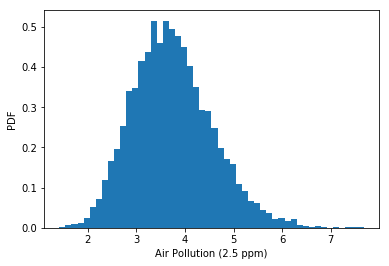

In [60]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(air_array, func = np.mean, size = 10000)

# Compute and print SEM
sem = np.std(air_array) / np.sqrt(len(air_array))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Air Pollution (2.5 ppm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Bootstrap replicates of the variance for the Air Pollution Data

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


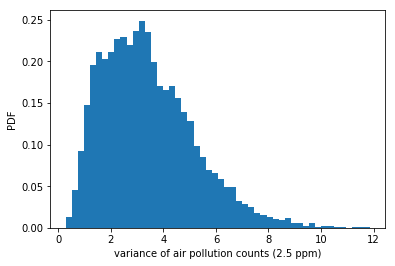

In [61]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(air_array, func = np.var, size = 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel('variance of air pollution counts (2.5 ppm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()



### Bootstrap replicates of the mean and the SEM of the Park Data

0.03711445388806841
0.03689116696274898


/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


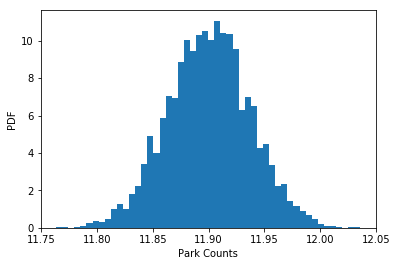

In [62]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(park_array, func = np.mean, size = 10000)

# Compute and print SEM
sem = np.std(park_array) / np.sqrt(len(park_array))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Park Counts')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Bootstrap replicates of the variance for the Park Pollution Data

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


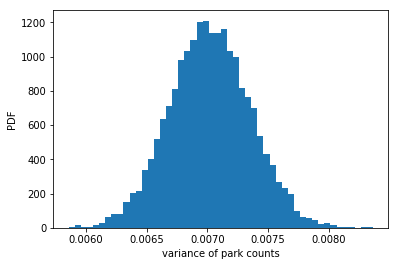

In [63]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(park_array, func = np.var, size = 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel('variance of park counts')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()




### Linear Regressions

In [64]:
# This function to be used for linear regression analysis
def draw_bs_pairs_linreg(x, y, size=1):

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

### Generate permutations from two samples
* To test the hypothesis that two variables have identical probability distributions

In [67]:
def permutation_sample(data1, data2):

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

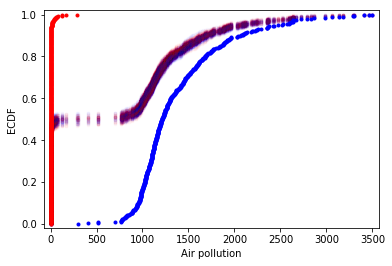

In [68]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(air_array, rent_array)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(air_array)
x_2, y_2 = ecdf(rent_array)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Air pollution')
_ = plt.ylabel('ECDF')
plt.show()

#### None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. Air pollution and median rain price are not identically distributed.

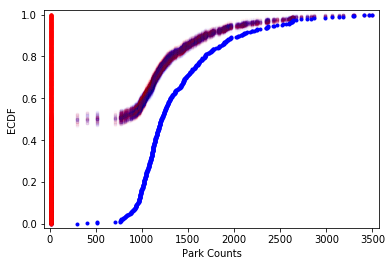

In [69]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(park_array, rent_array)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(park_array)
x_2, y_2 = ecdf(rent_array)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Park Counts')
_ = plt.ylabel('ECDF')
plt.show()

#### None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. Air pollution and median rain price are not identically distributed.

### Generating permutation replicates

In [70]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [72]:
import statsmodels.api as sm

In [77]:
X = merged_df_clean_nan[['Air Pollution Count', 'Park Counts']]
y = rent_array

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Median Rent   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1724.
Date:                Thu, 28 Feb 2019   Prob (F-statistic):          2.20e-227
Time:                        12:23:31   Log-Likelihood:                -3928.0
No. Observations:                 511   AIC:                             7860.
Df Residuals:                     509   BIC:                             7869.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Air Pollution Count     8.1625      1.257      6.493      0.000       5.693      10.632
Park Counts           111.8905      1.996     56.054      0.000     107.969     115.812
==============================================================================
Omnibus:                      130.518   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.637
Skew:                           1.326   Prob(JB):                     2.34e-65
Kurtosis:                       5.636   Cond. No.                         1.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
from sklearn import linear_model

Index(['Air Pollution Count', 'neighborhood_x', 'tract number', 'Park Counts',
       'Lat', 'Lng', 'Median Rent', 'Neighborhood', 'Location'],
      dtype='object')

In [87]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Create arrays for features and target variable
y = merged_df_clean_nan['Median Rent'].values
X = merged_df_clean_nan['Air Pollution Count'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (511,)
Dimensions of X before reshaping: (511,)
Dimensions of y after reshaping: (511, 1)
Dimensions of X after reshaping: (511, 1)


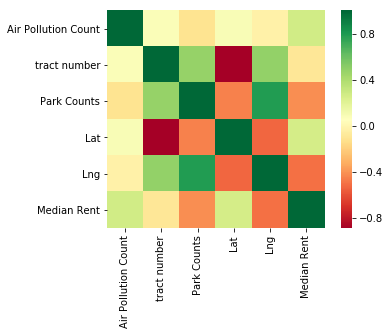

In [88]:
sns.heatmap(merged_df_clean_nan.corr(), square=True, cmap='RdYlGn')
plt.savefig('air_park_rent_correlation.png')

The R^2: 0.07491492082278683


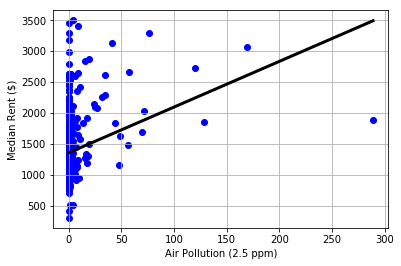

In [95]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(f"The R^2: {reg.score(X, y)}")

# Plot regression line
plt.scatter(X, y, color = "blue")
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Air Pollution (2.5 ppm)")
plt.ylabel("Median Rent ($)")
plt.grid()
plt.show()


#### Train/test split for regression
* Dataset is split into training and testing sets, and then fit and predict a linear regression over all features. 
* In addition to computing the R2, also compute the Root Mean Squared Error (RMSE)
* RMSE is used to evaluate regression models.

In [96]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.13741378903065493
Root Mean Squared Error: 444.1088521016193


In [97]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[-0.40562522  0.05262261  0.09158178  0.1166161   0.02322707]
Average 5-Fold CV Score: -0.024315532116635997


### Linear Regression for Parks

In [100]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Create arrays for features and target variable
y = merged_df_clean_nan['Median Rent'].values
Xp = merged_df_clean_nan['Park Counts'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(Xp.shape))

# Reshape X and y
y = y.reshape(-1, 1)
Xp = Xp.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(Xp.shape))



Dimensions of y before reshaping: (511,)
Dimensions of X before reshaping: (511,)
Dimensions of y after reshaping: (511, 1)
Dimensions of X after reshaping: (511, 1)


The R^2: 0.17041403218835172


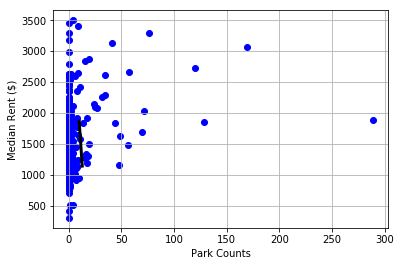

In [101]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(Xp), max(Xp)).reshape(-1,1)

# Fit the model to the data
reg.fit(Xp, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(f"The R^2: {reg.score(Xp, y)}")

# Plot regression line
plt.scatter(X, y, color = "blue")
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Park Counts")
plt.ylabel("Median Rent ($)")
plt.grid()
plt.show()
